# Import libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
from scipy.stats import binom,poisson

from scipy import stats

# Prepare datas

In [2]:
hvn = pd.read_csv("New HVN.csv")

In [3]:
hvn = hvn[::-1]

In [4]:
hvn["Time"] = pd.to_datetime(hvn["Time"], infer_datetime_format=True)

In [5]:
hvn.set_index("Time", inplace=True)

In [6]:
hvn

,Close
Time,
2019-05-08,38472.6
2019-05-09,38277.1
2019-05-10,38228.2
2019-05-13,39205.9
2019-05-14,40281.4
...,...
2022-12-01,10450.0
2022-12-02,10650.0
2022-12-05,11050.0


In [7]:
hvn.describe()

,Close
count,903.000000
mean,22788.881395
std,6251.406379
min,8610.000000
25%,19792.000000
50%,21829.000000
75%,25800.000000
max,43997.000000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


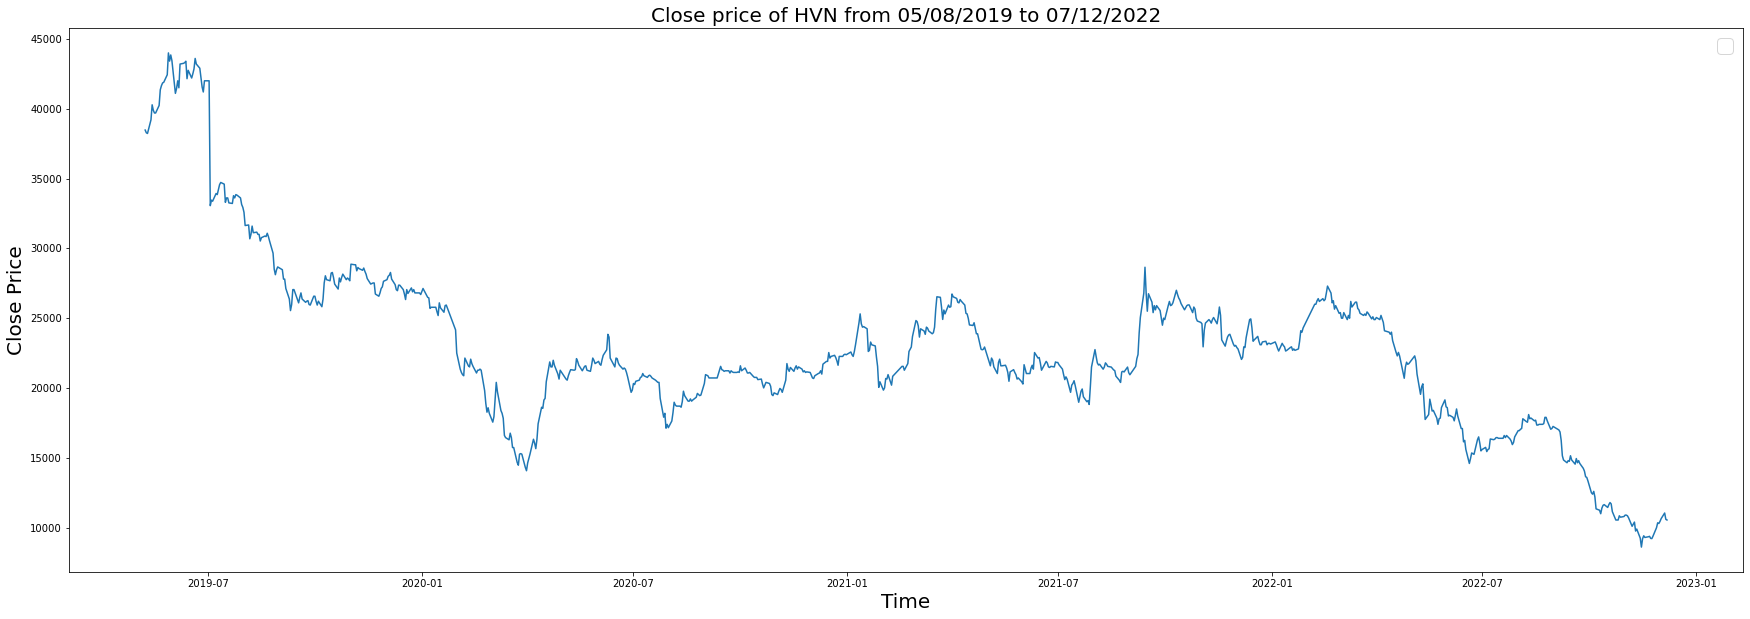

In [8]:
f = plt.figure()
f.set_figwidth(30)
f.set_figheight(10)

plt.plot(hvn)

plt.xlabel("Time", fontsize=20)
plt.ylabel("Close Price", fontsize=20)
plt.title("Close price of HVN from 05/08/2019 to 07/12/2022", fontsize=20)

plt.legend(loc="best", fontsize=20)

# Normal distribution test

<AxesSubplot:ylabel='Count'>

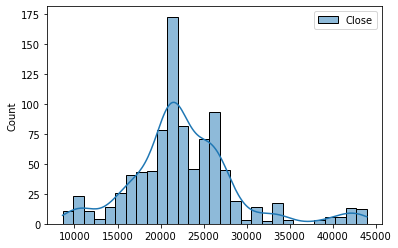

In [9]:
sns.histplot(hvn, kde=True)

=> Data is non-normal distribution

# Transform data to normal and binominal distribution

## 1. Normal distribution

In [10]:
hvn["Difference"] = hvn.diff()
hvn.dropna(inplace=True)

In [11]:
hvn

,Close,Difference
Time,,
2019-05-09,38277.1,-195.5
2019-05-10,38228.2,-48.9
2019-05-13,39205.9,977.7
2019-05-14,40281.4,1075.5
2019-05-15,39890.3,-391.1
...,...,...
2022-12-01,10450.0,150.0
2022-12-02,10650.0,200.0
2022-12-05,11050.0,400.0


In [12]:
#Lower and upper with confidence 99.7%
lower = hvn["Difference"].mean()-3*hvn["Difference"].std()
upper = hvn["Difference"].mean()+3*hvn["Difference"].std()
print("With confidence 99.7%, data is between {0} and {1}".format(lower, upper))

With confidence 99.7%, data is between -1798.8156612687192 and 1736.9030226877878


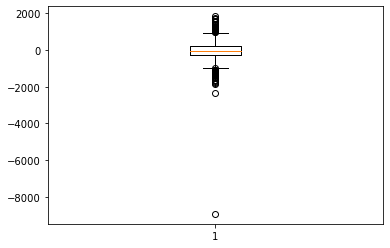

In [13]:
plt.boxplot(hvn["Difference"])
plt.show()

In [14]:
print(hvn[hvn["Difference"]<lower], hvn[hvn["Difference"]>upper])

              Close  Difference
Time                           
2019-06-03  41100.0     -2350.0
2019-07-03  33059.0     -8941.0
2021-09-15  26800.0     -1850.0               Close  Difference
Time                           
2021-09-13  26800.0      1750.0
2021-09-14  28650.0      1850.0


In [15]:
#Solving outliner 
for i in range(0,len(hvn["Difference"])):
    if (hvn["Difference"][i]<lower):
        hvn["Difference"][i]=lower
    elif (hvn["Difference"][i]>upper):
        hvn["Difference"][i]=upper
    else:
        hvn["Difference"][i]=hvn["Difference"][i]    

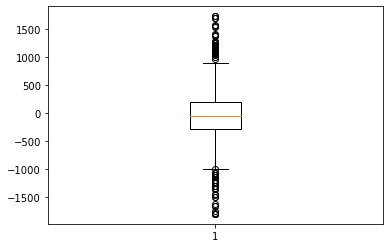

In [16]:
plt.boxplot(hvn["Difference"])
plt.show()

In [17]:
print(hvn[hvn["Difference"]<lower], hvn[hvn["Difference"]>upper])

Empty DataFrame
Columns: [Close, Difference]
Index: [] Empty DataFrame
Columns: [Close, Difference]
Index: []


<AxesSubplot:xlabel='Difference', ylabel='Count'>

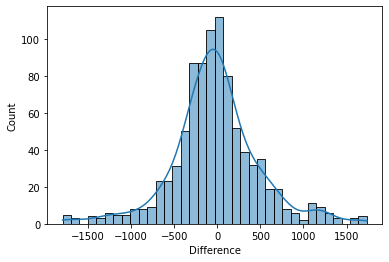

In [18]:
sns.histplot(hvn["Difference"], kde=True)